<a href="https://colab.research.google.com/github/sachinthadilshann/UdemyMLProjects/blob/main/E_signing_of_customers_based_on_financial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [279]:
df = pd.read_csv('https://raw.githubusercontent.com/sachinthadilshann/UdemyMLProjects/refs/heads/main/financial_data.csv')

In [280]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [281]:
df.shape

(17908, 21)

In [282]:
df.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [284]:
df.isnull().sum()

,0
entry_id,0
age,0
pay_schedule,0
home_owner,0
income,0
months_employed,0
years_employed,0
current_address_year,0
personal_account_m,0
personal_account_y,0


In [285]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [286]:
df['pay_schedule'].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [287]:
df['pay_schedule'].nunique()

4

In [288]:
df = pd.get_dummies(df, columns=['pay_schedule'])
df.drop('pay_schedule_monthly', axis=1, inplace=True)
df.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_bi-weekly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,True,False,False
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,False,False,True
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,False,False,True
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,True,False,False
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,False,True,False


In [289]:
df['pay_schedule_bi-weekly'] = df['pay_schedule_bi-weekly'].astype(int)
df['pay_schedule_weekly'] = df['pay_schedule_weekly'].astype(int)
df['pay_schedule_semi-monthly'] = df['pay_schedule_semi-monthly'].astype(int)

In [290]:
df.shape

(17908, 23)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   entry_id                   17908 non-null  int64  
 1   age                        17908 non-null  int64  
 2   home_owner                 17908 non-null  int64  
 3   income                     17908 non-null  int64  
 4   months_employed            17908 non-null  int64  
 5   years_employed             17908 non-null  int64  
 6   current_address_year       17908 non-null  int64  
 7   personal_account_m         17908 non-null  int64  
 8   personal_account_y         17908 non-null  int64  
 9   has_debt                   17908 non-null  int64  
 10  amount_requested           17908 non-null  int64  
 11  risk_score                 17908 non-null  int64  
 12  risk_score_2               17908 non-null  float64
 13  risk_score_3               17908 non-null  flo

<Axes: xlabel='e_signed', ylabel='count'>

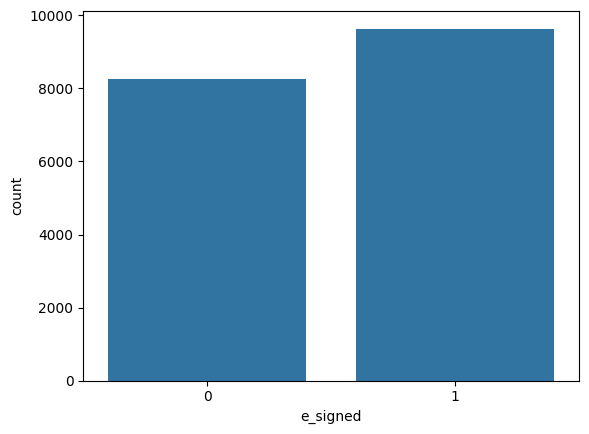

In [292]:
sns.countplot(data=df, x='e_signed')

In [293]:
(df.e_signed ==1).sum()

9639

In [294]:
(df.e_signed ==0).sum()

8269

In [295]:
df.head(2)

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_bi-weekly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,1,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1


In [296]:
df['months_employeds'] = (df.months_employed + df.years_employed*12)

In [297]:
df['personal_account_months'] = (df.personal_account_m + df.personal_account_y*12)

In [298]:
df.drop(['years_employed', 'months_employed', 'personal_account_m', 'personal_account_y'], axis=1, inplace=True)

In [299]:
df.head(2)

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_bi-weekly,pay_schedule_semi-monthly,pay_schedule_weekly,months_employeds,personal_account_months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,1,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86


In [300]:
df_1 = df.drop(columns=['entry_id','e_signed'], axis=1)


<Axes: title={'center': 'Correlation with E_Signed'}>

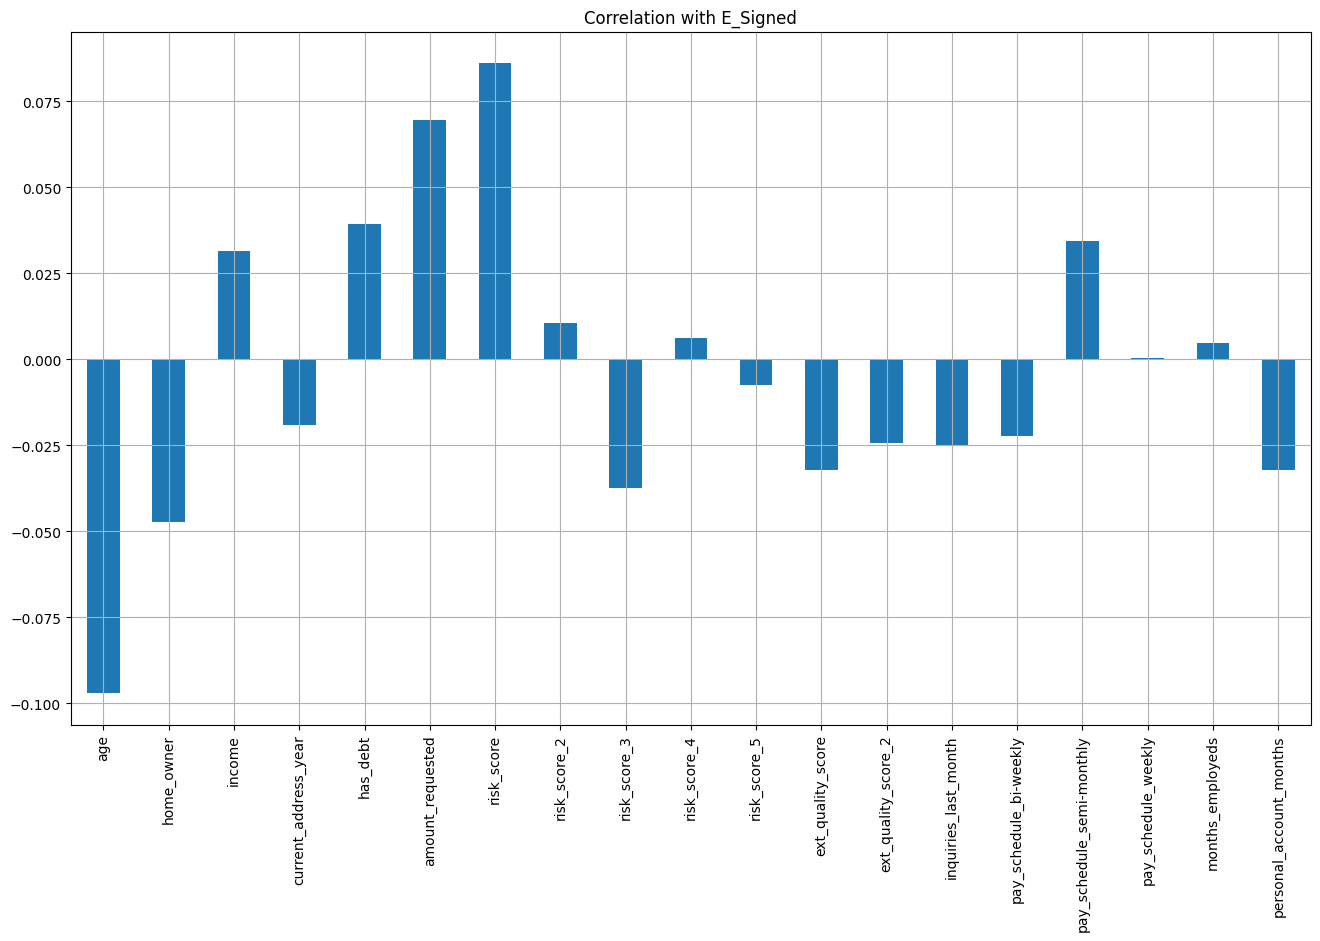

In [301]:
df_1.corrwith(df['e_signed']).plot.bar(
    figsize = (16, 9), title = "Correlation with E_Signed",
    grid = True
)

<Axes: >

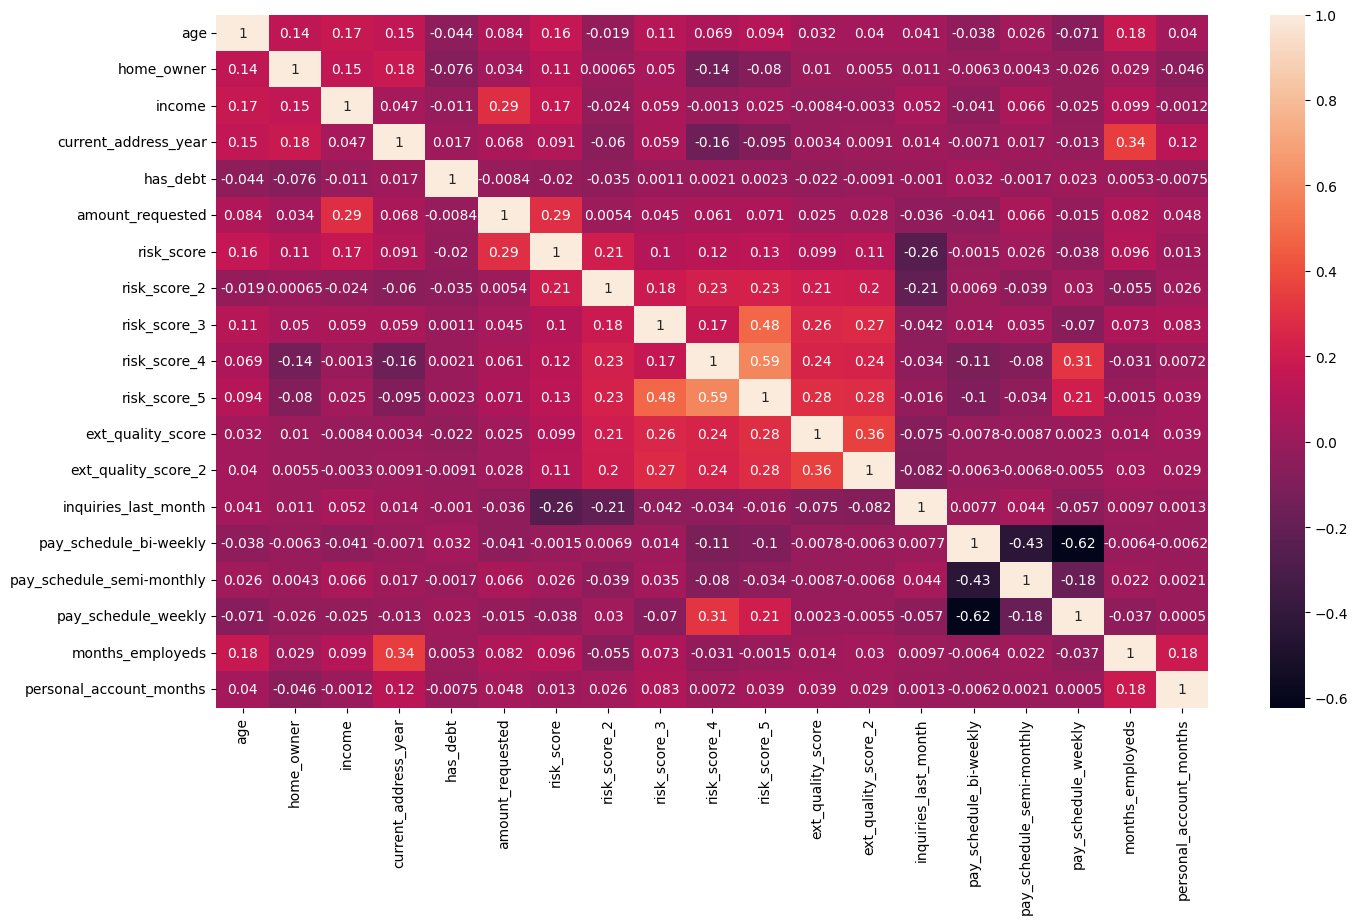

In [302]:
plt.figure(figsize=(16, 9))
sns.heatmap(df_1.corr(), annot=True)

In [303]:
df.head(2)

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_bi-weekly,pay_schedule_semi-monthly,pay_schedule_weekly,months_employeds,personal_account_months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,1,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86


In [304]:
df =  df.drop('entry_id', axis=1)


In [305]:
x = df.drop('e_signed', axis=1)
y = df['e_signed']

In [306]:
x

,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,pay_schedule_bi-weekly,pay_schedule_semi-monthly,pay_schedule_weekly,months_employeds,personal_account_months
0,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,36,30
1,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,1,72,86
2,23,0,1540,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,1,6,19
3,40,0,5230,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,72,86
4,33,0,3590,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,1,0,60,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,31,0,3245,3,1,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0,0,0,60,74
17904,46,0,6525,1,1,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,1,0,0,24,39
17905,46,0,2685,1,1,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0,0,1,60,97
17906,42,0,2515,5,1,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1,0,0,36,18


In [307]:
y

,e_signed
0,1
1,0
2,0
3,1
4,0
...,...
17903,0
17904,0
17905,0
17906,1


In [308]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [309]:
x_train.shape,y_train.shape

((14326, 19), (14326,))

In [310]:
x_test.shape,y_test.shape

((3582, 19), (3582,))

In [311]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [312]:
x_test

array([[-0.4171009 ,  1.16208915, -1.3504513 , ..., -0.51249159,
        -1.17424547,  0.1516635 ],
       [-0.83872232, -0.86051918, -1.28760279, ..., -0.51249159,
         0.28052681,  0.3235976 ],
       [ 0.51046623,  1.16208915, -0.0736343 , ..., -0.51249159,
        -0.27900099, -0.79397408],
       ...,
       [ 1.35370908, -0.86051918,  0.6276227 , ..., -0.51249159,
         0.61624349, -0.70800703],
       [ 0.59479052, -0.86051918,  0.39938339, ..., -0.51249159,
        -1.50996215,  0.23763055],
       [-0.50142518,  1.16208915, -0.43749407, ...,  1.95125153,
        -0.27900099, -0.53607292]])

In [313]:
x_train

array([[-1.59764088,  1.16208915,  2.27028414, ..., -0.51249159,
         0.65354534,  1.74205397],
       [ 0.51046623, -0.86051918, -0.30848924, ..., -0.51249159,
         0.61624349, -0.79397408],
       [ 1.01641194, -0.86051918, -0.66573337, ..., -0.51249159,
         1.06386573,  1.74205397],
       ...,
       [-0.9230466 , -0.86051918,  0.00244547, ..., -0.51249159,
        -0.68932138, -0.83695761],
       [-1.09169517,  1.16208915,  0.93524959, ...,  1.95125153,
        -1.17424547,  1.7850375 ],
       [-0.9230466 ,  1.16208915, -1.30083405, ..., -0.51249159,
        -0.72662323,  0.1516635 ]])

**LogisticRegression**

In [314]:
from sklearn.linear_model import LogisticRegression

In [315]:
model_lr = LogisticRegression(random_state=0)


In [316]:
model_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [317]:
y_pred_lr = model_lr.predict(x_test)

In [318]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [319]:
acc_lr = accuracy_score(y_test, y_pred_lr)*100
acc_lr

56.75600223338917

In [320]:
confusion_matrix(y_test, y_pred_lr)

array([[ 675,  977],
       [ 572, 1358]])

**SVM**

In [321]:
from sklearn.svm import SVC

model_svc = SVC(random_state=0)
model_svc.fit(x_train, y_train)

SVC(random_state=0)

In [322]:
y_pred_svc = model_svc.predict(x_test)
acc_scv = accuracy_score(y_test, y_pred_svc)*100
acc_scv

60.72026800670016

In [323]:
confusion_matrix(y_test, y_pred_svc)

array([[ 801,  851],
       [ 556, 1374]])

**RandomForestClassifier**

In [324]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=0)
model_rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [325]:
y_pred_rfc = model_rfc.predict(x_test)

In [326]:
acc_rfc = accuracy_score(y_test, y_pred_rfc)*100
acc_rfc

62.534896705750974

In [327]:
confusion_matrix(y_test, y_pred_rfc)

array([[ 941,  711],
       [ 631, 1299]])

**XGBClassifier**

In [328]:
from xgboost import XGBClassifier

In [329]:
model_xgb = XGBClassifier(random_state=0)
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [330]:
y_pred_xgb = model_xgb.predict(x_test)

In [331]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)*100
acc_xgb

62.395309882747064

In [332]:
confusion_matrix(y_test, y_pred_xgb)

array([[ 936,  716],
       [ 631, 1299]])

Apply the Randomized search to find best params

In [333]:
from sklearn.model_selection import RandomizedSearchCV

In [334]:
params = {
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth': [3,4,5,6,8,10,12,15],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.7],
    'n_estimators': [50,100,150,160,170,180,190,200],
    'subsample': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1.0]

}

In [335]:
random_search = RandomizedSearchCV(model_xgb,
                                   param_distributions=params,
                                   n_iter=5,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv=5,
                                   verbose=3)

In [336]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=0, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [50, 100, 150, 160, 170,
                                                         180, 190, 200],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 1.0]},
                   scoring='roc_auc', verbose=3)

In [337]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [338]:
random_search.best_params_

{'subsample': 0.7,
 'n_estimators': 180,
 'min_child_weight': 7,
 'max_depth': 4,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [339]:
random_search.best_score_

0.6935336333867665

In [340]:
model_xgb_final = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=np.nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0)
model_xgb_final.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [341]:
y_pred_xgb_final = model_xgb_final.predict(x_test)
acc_final = accuracy_score(y_test, y_pred_xgb_final)*100
acc_final

63.8749302065885

In [342]:
accuracy_scores = {
    'Logistic Regression': acc_lr,
    'SVM': acc_scv,
    'Random Forest': acc_rfc,
    'XGBoost': acc_xgb,
    'XGBoost (Tuned)': acc_final
}

accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
accuracy_df

,Model,Accuracy
0,Logistic Regression,56.756002
1,SVM,60.720268
2,Random Forest,62.534897
3,XGBoost,62.395310
4,XGBoost (Tuned),63.874930


In [343]:
df.head(2)

,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_bi-weekly,pay_schedule_semi-monthly,pay_schedule_weekly,months_employeds,personal_account_months
0,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,1,0,0,36,30
1,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72,86


In [357]:
person_1 = [(40, 1, 3135, 3, 1, 550, 36200, 0.737398, 0.903517, 0.487712, 0.515977, 0.580918, 0.380918, 10, 1, 0, 0, 36, 30)]


In [358]:
result = model_xgb_final.predict(sc.transform(person_1))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [359]:
print(result)

[1]


In [355]:
person_2 = [(28, 0, 7000, 3, 1, 600, 30150, 0.538510, 0.681027, 0.413423, 0.826402, 0.730720, 0.630720, 2,  0, 0, 1, 35, 30
)]
result_2 = model_xgb_final.predict(sc.transform(person_2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [356]:
print(result_2)

[0]
